# **Project Overview**

* This project performs an exploratory data analysis (EDA) on NIFTY50 constituent stocks to understand overall market behavior.

* The analysis focuses on price movements, returns, and volatility to evaluate stock performance and risk patterns.

* Data cleaning and preprocessing were carried out to ensure accuracy and consistency before analysis.

* A variety of visualization techniques were used to identify trends, distributions, and stock-wise comparisons.

* The project aims to uncover periods of market uncertainty, high-risk stocks, and stable investment options.

* Insights derived from the analysis support data-driven investment decisions, risk management, and portfolio optimization.

## Setup & Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
plt.style.use("ggplot")
sns.set_palette("Set2")

In [4]:
# Load data
df = pd.read_csv("/content/NIFTY50_all.csv")

df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,EQ,188.00,190.60,191.10,185.10,186.70,186.40,187.35,8542755,1.600451e+14,52374.0,2340188.0,0.2739
235188,2021-04-27,ZEEL,EQ,186.40,188.00,192.95,186.80,188.80,188.15,189.41,14247767,2.698636e+14,73673.0,5425957.0,0.3808
235189,2021-04-28,ZEEL,EQ,188.15,188.80,190.60,187.10,188.95,189.10,188.85,8429439,1.591917e+14,44056.0,2413974.0,0.2864
235190,2021-04-29,ZEEL,EQ,189.10,190.80,191.65,186.00,186.60,186.55,187.44,9483009,1.777471e+14,60932.0,2744472.0,0.2894


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235192 entries, 0 to 235191
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                235192 non-null  object 
 1   Symbol              235192 non-null  object 
 2   Series              235192 non-null  object 
 3   Prev Close          235192 non-null  float64
 4   Open                235192 non-null  float64
 5   High                235192 non-null  float64
 6   Low                 235192 non-null  float64
 7   Last                235192 non-null  float64
 8   Close               235192 non-null  float64
 9   VWAP                235192 non-null  float64
 10  Volume              235192 non-null  int64  
 11  Turnover            235192 non-null  float64
 12  Trades              120344 non-null  float64
 13  Deliverable Volume  219115 non-null  float64
 14  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(3

In [6]:
# Date handling
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Symbol', 'Date'])

## Feature engineering

In [7]:
df['Volatility'] = df['High'] - df['Low']
df['Gap'] = df['Open'] - df['Prev Close']
df['Daily_Return'] = (df['Close'] - df['Prev Close']) / df['Prev Close']
df['Close_Position'] = (df['Close'] - df['Low']) / (df['High'] - df['Low'])
df['Year'] = df['Date'].dt.year

df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volatility,Gap,Daily_Return,Close_Position,Year
1023,2012-01-17,ADANIPORTS,EQ,135.50,137.10,141.00,135.00,140.10,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,6.00,1.60,0.033210,0.833333,2012
1024,2012-01-18,ADANIPORTS,EQ,140.00,142.00,143.80,138.70,143.00,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,5.10,2.00,0.012143,0.588235,2012
1025,2012-01-19,ADANIPORTS,EQ,141.70,144.00,150.55,143.15,149.50,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,7.40,2.30,0.054340,0.844595,2012
1026,2012-01-20,ADANIPORTS,EQ,149.40,151.90,157.60,150.25,155.40,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,7.35,2.50,0.040161,0.700680,2012
1027,2012-01-23,ADANIPORTS,EQ,155.40,155.40,155.40,145.10,146.40,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,10.30,0.00,-0.055663,0.160194,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231677,2007-02-21,ZEETELE,EQ,249.75,254.45,259.00,249.00,254.40,255.15,254.73,1587042,4.042693e+13,NaN,580722.0,0.3659,10.00,4.70,0.021622,0.615000,2007
231678,2007-02-22,ZEETELE,EQ,255.15,256.90,259.70,250.30,252.25,254.10,255.37,2035216,5.197417e+13,NaN,949702.0,0.4666,9.40,1.75,-0.004115,0.404255,2007
231679,2007-02-23,ZEETELE,EQ,254.10,255.80,255.80,244.50,249.10,248.75,248.55,978816,2.432823e+13,NaN,526797.0,0.5382,11.30,1.70,-0.021055,0.376106,2007
231680,2007-02-26,ZEETELE,EQ,248.75,253.80,253.80,242.80,244.70,244.30,246.03,833714,2.051155e+13,NaN,438789.0,0.5263,11.00,5.05,-0.017889,0.136364,2007


In [8]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volatility,Gap,Daily_Return,Close_Position,Year
1023,2012-01-17,ADANIPORTS,EQ,135.5,137.1,141.00,135.00,140.1,140.00,138.13,1636196,2.260074e+13,18374.0,1004327.0,0.6138,6.00,1.6,0.033210,0.833333,2012
1024,2012-01-18,ADANIPORTS,EQ,140.0,142.0,143.80,138.70,143.0,141.70,141.25,890591,1.257986e+13,15615.0,404925.0,0.4547,5.10,2.0,0.012143,0.588235,2012
1025,2012-01-19,ADANIPORTS,EQ,141.7,144.0,150.55,143.15,149.5,149.40,146.72,1456077,2.136382e+13,31299.0,721545.0,0.4955,7.40,2.3,0.054340,0.844595,2012
1026,2012-01-20,ADANIPORTS,EQ,149.4,151.9,157.60,150.25,155.4,155.40,153.76,1634070,2.512583e+13,23335.0,861145.0,0.5270,7.35,2.5,0.040161,0.700680,2012
1027,2012-01-23,ADANIPORTS,EQ,155.4,155.4,155.40,145.10,146.4,146.75,149.54,1657609,2.478768e+13,12400.0,820653.0,0.4951,10.30,0.0,-0.055663,0.160194,2012


## Remove all the null values in dataset


In [9]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [10]:
df['Trades'].fillna(0, inplace=True)

/tmp/ipython-input-1167206167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trades'].fillna(0, inplace=True)


In [11]:
df['Deliverable Volume'].fillna(0, inplace=True)

/tmp/ipython-input-1524129994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deliverable Volume'].fillna(0, inplace=True)


In [12]:
df['%Deliverble'].fillna(df['%Deliverble'].median(), inplace=True)


/tmp/ipython-input-577524328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['%Deliverble'].fillna(df['%Deliverble'].median(), inplace=True)


In [13]:
df['Close_Position'].fillna(df['Close_Position'].median(), inplace=True)


/tmp/ipython-input-1595784734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close_Position'].fillna(df['Close_Position'].median(), inplace=True)


In [14]:
df.isnull().sum().sum()

np.int64(0)

## 1. Dataset Coverage

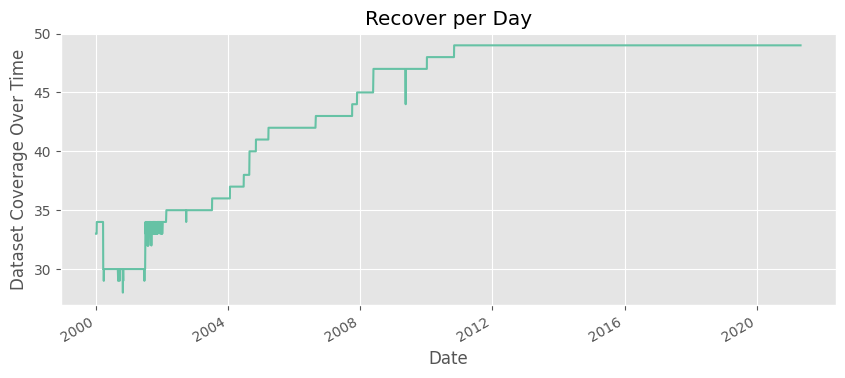

In [34]:
df.groupby("Date").size().plot(figsize = (10,4))
plt.ylabel('Dataset Coverage Over Time')
plt.title("Recover per Day")
plt.show()

## 2. Duplicate Records Validation

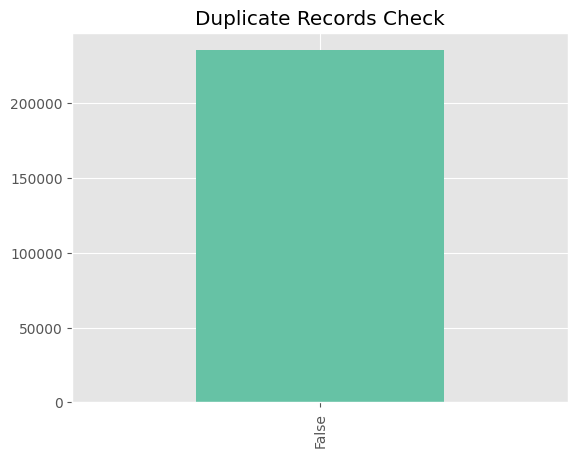

In [16]:
duplicates = df.duplicated().value_counts()

duplicates.plot(kind='bar')
plt.title("Duplicate Records Check")
plt.show()


## 3. Trading Days per Year

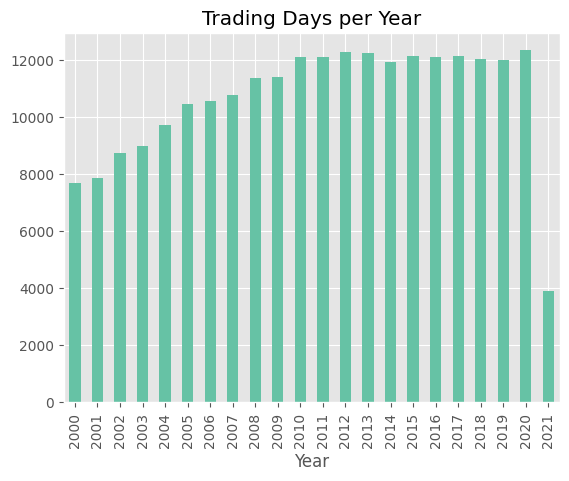

In [17]:
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Trading Days per Year")
plt.show()

# 4.Records per Stock


Text(0.5, 1.0, 'Records per Stock')

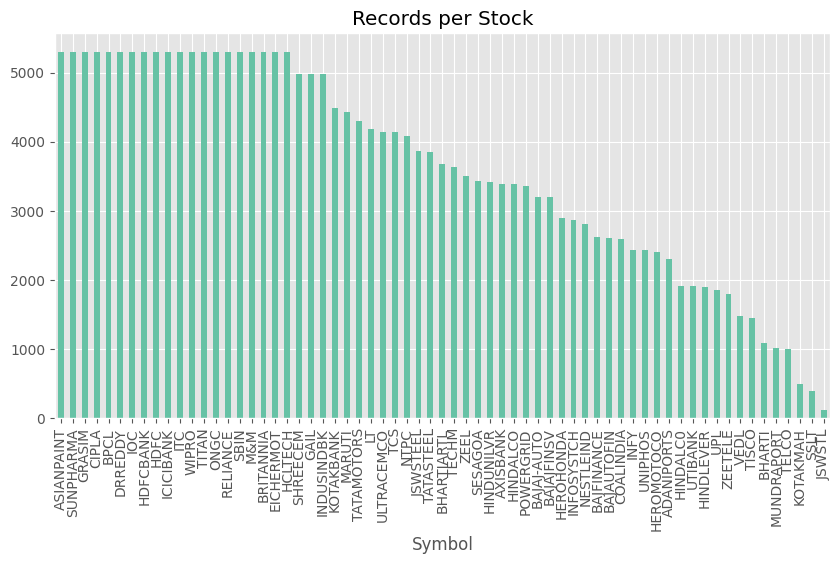

In [22]:
df['Symbol'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Records per Stock')

## 5. Overall Market Trend

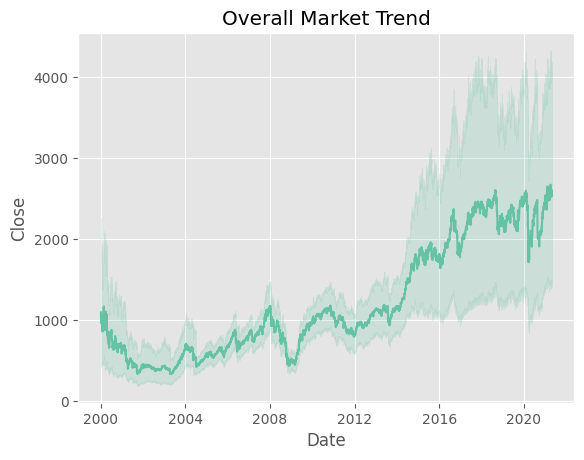

<Figure size 1000x400 with 0 Axes>

In [18]:
sns.lineplot(data = df,x ='Date',y='Close')
plt.title('Overall Market Trend')
plt.figure(figsize=(10,4))
plt.show()

## 6. Rolling Average Trend (20 DMA)

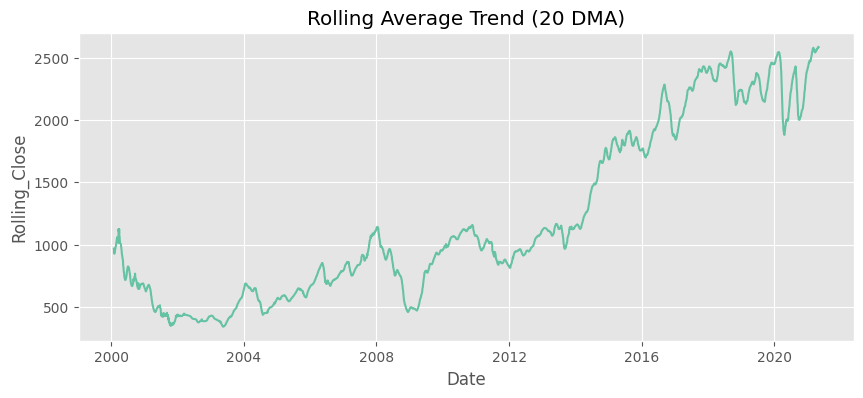

In [19]:
df['Rolling_Close'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(20).mean())
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Date', y='Rolling_Close', errorbar=None)
plt.title('Rolling Average Trend (20 DMA)')
plt.show()

## 7. Bull vs Bear Days

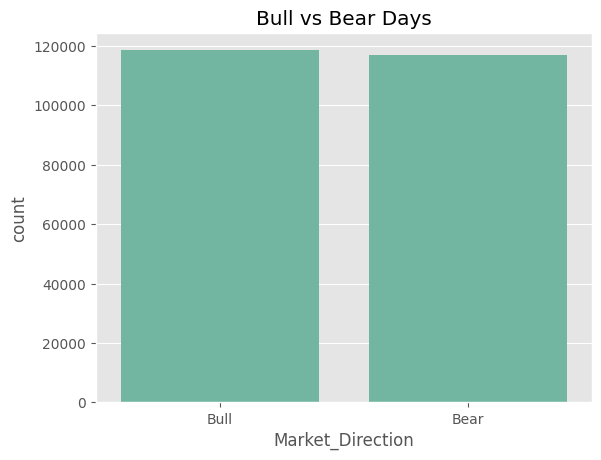

In [22]:
df['Market_Direction'] = np.where(df['Close'] > df['Prev Close'], 'Bull', 'Bear')
sns.countplot(data=df, x='Market_Direction')
plt.title("Bull vs Bear Days")
plt.show()


## 8.Gap-Down Distribution

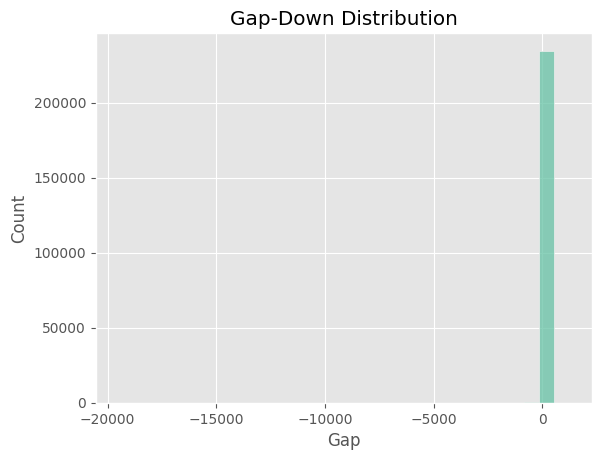

In [24]:
import seaborn as sns
sns.histplot(df['Gap'],bins = 30)
plt.title("Gap-Down Distribution")
plt.show()

### 9. Open vs Close Relationship

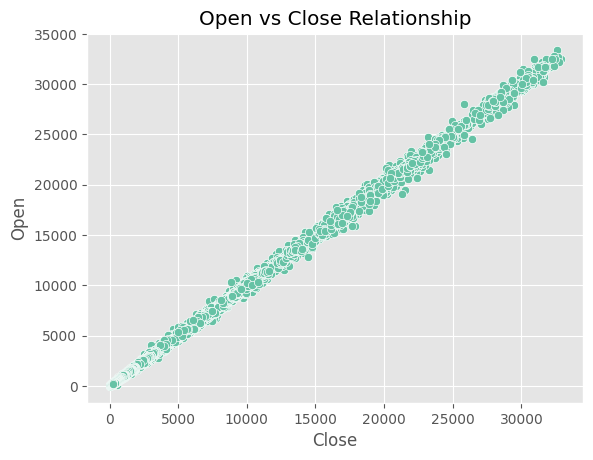

In [30]:
sns.scatterplot(data=df, y='Open',x='Close',alpha=1)
plt.title("Open vs Close Relationship")
plt.show()

### 10. Closing Strength

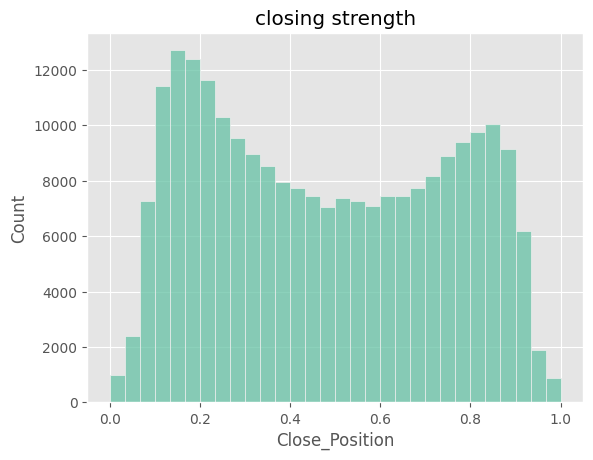

In [32]:
sns.histplot(df['Close_Position'],bins = 30)
plt.title('closing strength')
plt.show()

### 11. Market Volatility Over Time

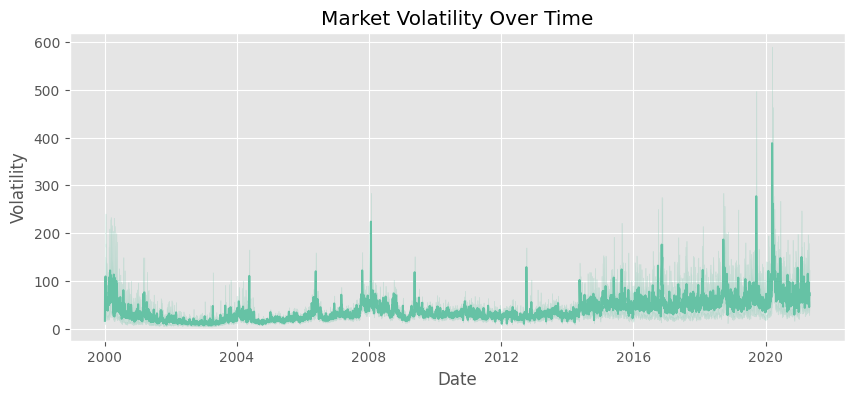

In [37]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x="Date",y="Volatility")
plt.title("Market Volatility Over Time")
plt.show()

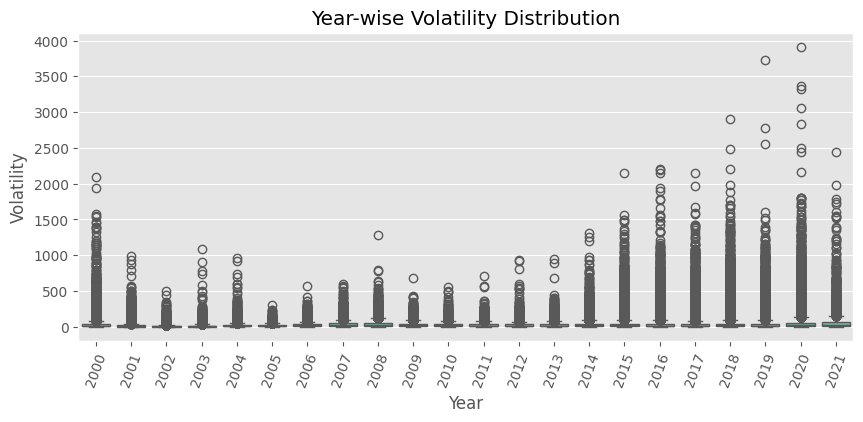

In [41]:
df['Year'] = df['Date'].dt.year

plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Year', y='Volatility')
plt.xticks(rotation=70)
plt.title("Year-wise Volatility Distribution")
plt.show()




### 12. Stock-wise Volatility

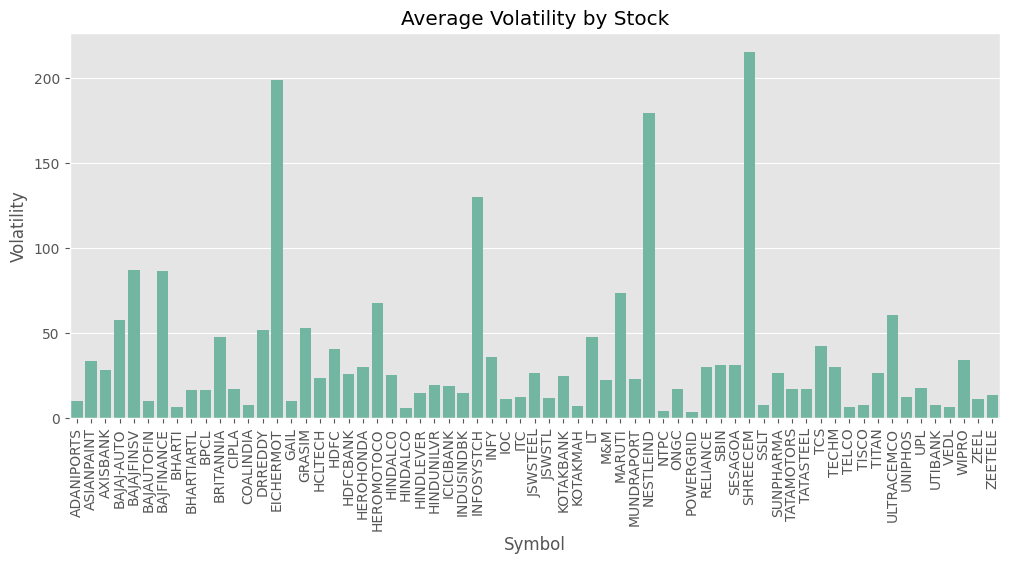

In [46]:
avg_vol = df.groupby('Symbol')['Volatility'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=avg_vol, x='Symbol', y='Volatility')
plt.title("Average Volatility by Stock")
plt.xticks(rotation=90)
plt.show()


### 13. Risk Return Tradeoff

        Symbol  Volatility  Daily_Return
0   ADANIPORTS   10.000957      0.001022
1   ASIANPAINT   33.724651      0.000815
2     AXISBANK   28.339157      0.000648
3   BAJAJ-AUTO   57.719300      0.000604
4   BAJAJFINSV   86.883005      0.001045
..         ...         ...           ...
60     UTIBANK    7.707453      0.002159
61        VEDL    6.532928      0.000554
62       WIPRO   34.327478      0.000233
63        ZEEL   11.032393      0.000368
64     ZEETELE   13.875947     -0.000036

[65 rows x 3 columns]


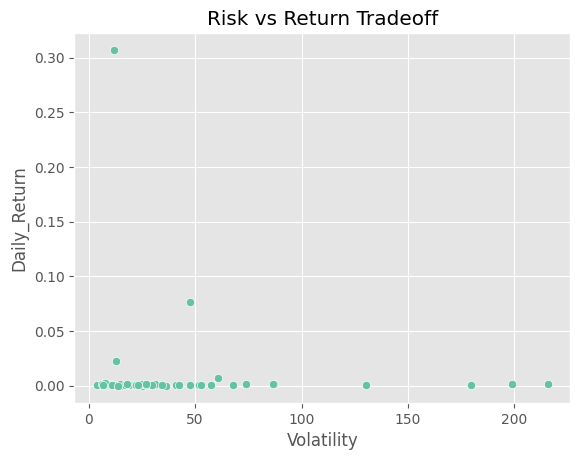

In [60]:
risk_return = df.groupby('Symbol').agg({
    'Volatility':'mean',
    'Daily_Return':'mean'
}).reset_index()

print(risk_return)

sns.scatterplot(data=risk_return, x='Volatility', y='Daily_Return')
plt.title("Risk vs Return Tradeoff")
plt.show()

### 14. Liquidity Leaders

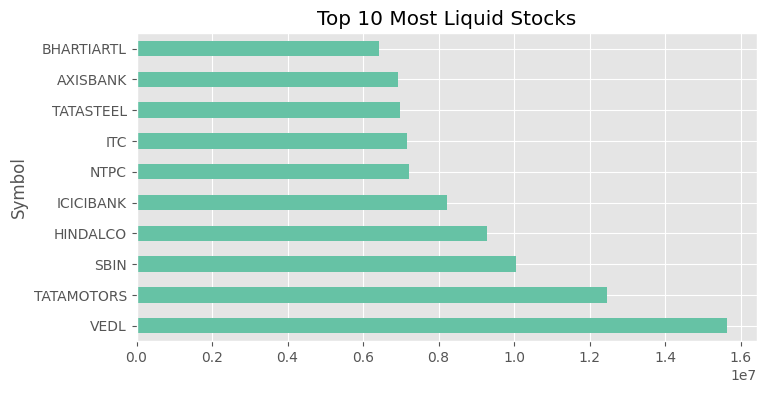

In [64]:
df.groupby('Symbol')['Volume'].mean().sort_values(ascending=False).head(10)\
.plot(kind='barh', figsize=(8,4))
plt.title("Top 10 Most Liquid Stocks")
plt.show()


# **Business Problems Addressed Through Visual Analysis**

This project uses exploratory data analysis and visualization techniques to address real-world business challenges in stock market analysis. Stock-wise volatility comparisons help identify high-risk and low-risk stocks, enabling better portfolio allocation decisions. Time-series volatility visualizations highlight periods of market uncertainty, supporting proactive risk management. Distribution and aggregation-based charts reveal stability differences and seasonal patterns across stocks, aiding long-term investment planning. Additionally, risk–return visual analysis shows that higher volatility does not always result in higher returns, reinforcing the importance of risk-adjusted decision-making. Overall, the visual insights support informed investment strategy formulation and portfolio optimization.

# **Conclusion**

This exploratory data analysis of NIFTY50 constituent stocks provided valuable insights into market behavior, volatility patterns, and stock-specific risk profiles. The analysis demonstrated significant variation in volatility across stocks and identified periods of heightened market uncertainty. By combining time-series, distribution, and comparative visualizations, the project effectively transformed raw market data into actionable insights. Overall, this study highlights the importance of data-driven analysis in supporting investment decisions, risk management, and strategic portfolio design.
